In [2]:
# Librerias para manipulacion de Data y Gráficas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Preparación de datos y configuración de pipeline para Machine Learning con scikit-learn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

#models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
#for classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#for regression
from sklearn.metrics import r2_score

In [3]:
datos = pd.read_csv("/content/data/datos_3dsv_balanceados.zip")

In [4]:
datos.shape

(631848, 12)

In [5]:
# Redondear al entero más cercano y convertir a int
columnas_a_redondear = ['presion_alterial_alta', 'colesterol_alto',
       'enfermedad_cardiaca', 'hace_ejercicio', 'come_fruta', 'come_vegetales',
       'edad', 'dificultad_caminar', 'genero', 'fuma', 'tipo']
datos[columnas_a_redondear] = datos[columnas_a_redondear].round()

# Modelo 1


In [6]:
X = datos.drop("tipo",axis=1)
y = datos['tipo']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [7]:
model = LogisticRegression(max_iter=1000)

In [8]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [9]:
y_predict = model.predict(X_test)

The accuracy of RandomForestClassifier is 0.4990


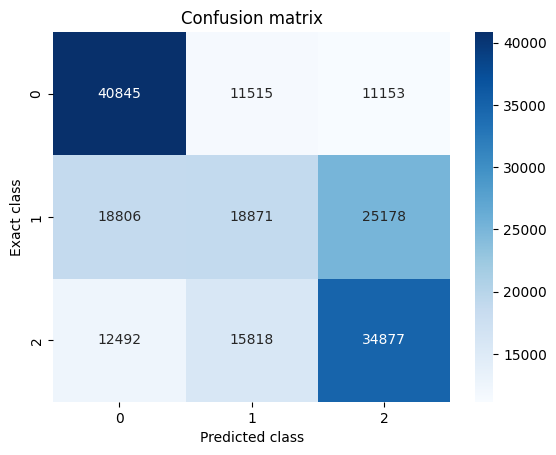

In [10]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of RandomForestClassifier is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['RandomForestClassifier'])
accuracy_RFmodel = pd.DataFrame({'accuracy':serie})

In [11]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.4990266677217694

Classification Report:
               precision    recall  f1-score   support

         0.0       0.57      0.64      0.60     63513
         1.0       0.41      0.30      0.35     62855
         2.0       0.49      0.55      0.52     63187

    accuracy                           0.50    189555
   macro avg       0.49      0.50      0.49    189555
weighted avg       0.49      0.50      0.49    189555

Specificity for class 0: 0.7517
Specificity for class 1: 0.7843
Specificity for class 2: 0.7125



Este modelo tiene un **accuracy del 49.9%**, lo que indica que acierta casi lo mismo que adivinar al azar. Aun así, muestra un **desempeño equilibrado entre las tres clases**, sin ignorar ninguna. Los valores de **precisión, recall y F1-score** están entre 0.30 y 0.64, lo que significa que el modelo **logra identificar parte de cada clase, aunque con margen de mejora**. Las **specificities** también son razonables (entre 71% y 75%), lo que indica que no comete demasiados falsos positivos. En resumen, es un modelo básico pero balanceado, útil como punto de partida para optimizar.

# Modelo 2

In [12]:
X = datos.drop("tipo",axis=1)
y = datos['tipo']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [13]:
model = KNeighborsClassifier() #con esto basta para entrenar el modelo gracias a sklearn
model.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
y_predict = model.predict(X_test)

The accuracy of KNeighborsClassifier is 0.7466


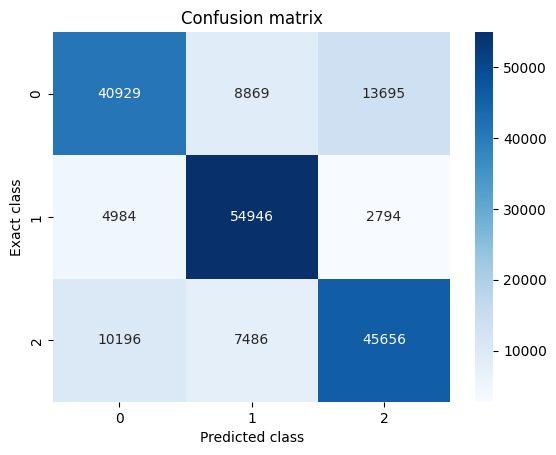

In [15]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of KNeighborsClassifier is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['KNeighborsClassifier'])
accuracy_KNmodel = pd.DataFrame({'accuracy':serie})

In [16]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.7466487299200759

Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.64      0.68     63493
         1.0       0.77      0.88      0.82     62724
         2.0       0.73      0.72      0.73     63338

    accuracy                           0.75    189555
   macro avg       0.74      0.75      0.74    189555
weighted avg       0.74      0.75      0.74    189555

Specificity for class 0: 0.8796
Specificity for class 1: 0.8710
Specificity for class 2: 0.8694



Este modelo tiene un **accuracy del 74.7%** y un desempeño **consistente en las tres clases**. Destaca especialmente en la clase 1, con un **recall del 88%**, lo que indica que identifica bien la mayoría de sus casos. Las clases 0 y 2 tienen resultados sólidos y parejos, con F1-scores cercanos a 0.70. Además, las **specificities son altas** (entre 86.9% y 87.9%), lo que significa que el modelo **comete pocos errores al predecir clases incorrectas**. En resumen, es un modelo **estable y balanceado**, con buena capacidad para clasificar correctamente todos los tipos de casos.

# Modelo 3

In [17]:
X = datos.drop("tipo",axis=1)
y = datos['tipo']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [18]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
y_predict = model.predict(X_test)

The accuracy of Decision Tree is 0.7813


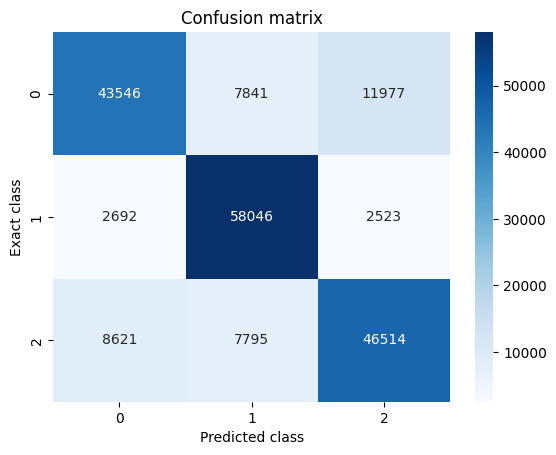

In [20]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Decision Tree is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['DecisionTreeClassifier'])
accuracy_DTmodel = pd.DataFrame({'accuracy':serie})

In [21]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.7813352325182664

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.69      0.74     63364
         1.0       0.79      0.92      0.85     63261
         2.0       0.76      0.74      0.75     62930

    accuracy                           0.78    189555
   macro avg       0.78      0.78      0.78    189555
weighted avg       0.78      0.78      0.78    189555

Specificity for class 0: 0.9104
Specificity for class 1: 0.8762
Specificity for class 2: 0.8855



Este modelo tiene un **accuracy del 78.1%** y un **desempeño muy balanceado en todas las clases**, con **F1-scores de 0.74, 0.85 y 0.75** para las clases 0, 1 y 2 respectivamente. Destaca especialmente en la clase 1, con un **recall del 92%**, lo que indica una excelente capacidad para detectar la mayoría de sus casos. Además, mantiene **specificities altas** (entre 87% y 91%), lo que significa que evita correctamente los falsos positivos. En conjunto, este modelo logra **precisión, cobertura y equilibrio**, por lo tanto, es el **mejor modelo hasta ahora en comparación con todos los anteriores** según todas las métricas clave.

# Modelo 4

In [22]:
pip install xgboost

In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Separar variables
X = datos.drop("tipo", axis=1)
y = datos["tipo"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [24]:
# Crear y entrenar el modelo XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # evita warnings
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:18:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [25]:
# Predecir
y_predict = model.predict(X_test)

The accuracy of Decision Tree is 0.5882


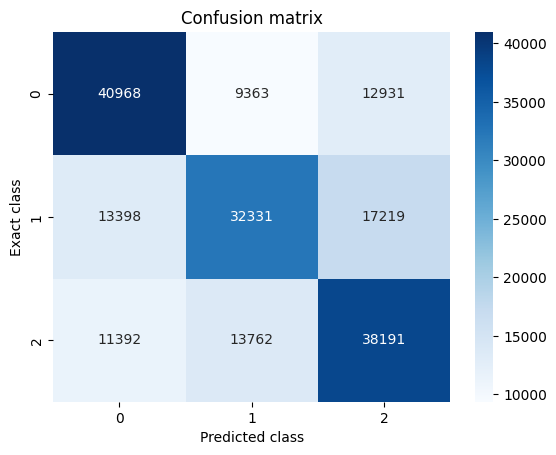

In [26]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Decision Tree is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['DecisionTreeClassifier'])
accuracy_DTmodel = pd.DataFrame({'accuracy':serie})

In [27]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.5881670227638416

Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      0.65      0.64     63262
         1.0       0.58      0.51      0.55     62948
         2.0       0.56      0.60      0.58     63345

    accuracy                           0.59    189555
   macro avg       0.59      0.59      0.59    189555
weighted avg       0.59      0.59      0.59    189555

Specificity for class 0: 0.8037
Specificity for class 1: 0.8173
Specificity for class 2: 0.7611



Este modelo tiene un **accuracy del 58.8%** y un **rendimiento parejo pero bajo** en las tres clases, con F1-scores entre **0.55 y 0.64**. Aunque no sobresale en ninguna categoría, **al menos no ignora ninguna clase**, lo que lo hace equilibrado. Las **specificities** son moderadamente altas (entre 76% y 81%), lo que indica que el modelo **controla los falsos positivos de forma aceptable**. En resumen, este modelo es **estable pero débil**, útil como base inicial, pero claramente **superado por modelos anteriores** en todas las métricas clave.

# Modelo 5

In [28]:
pip install lightgbm


In [29]:
from lightgbm import LGBMClassifier

# Separar variables
X = datos.drop("tipo", axis=1)
y = datos["tipo"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)


In [30]:
# Crear el modelo LightGBM
model = LGBMClassifier(objective='multiclass', num_class=3, class_weight='balanced', random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 442293, number of used features: 11
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


LGBMClassifier(class_weight='balanced', num_class=3, objective='multiclass',
               random_state=42)

In [31]:
# Predecir
y_predict = model.predict(X_test)

The accuracy of Decision Tree is 0.5795


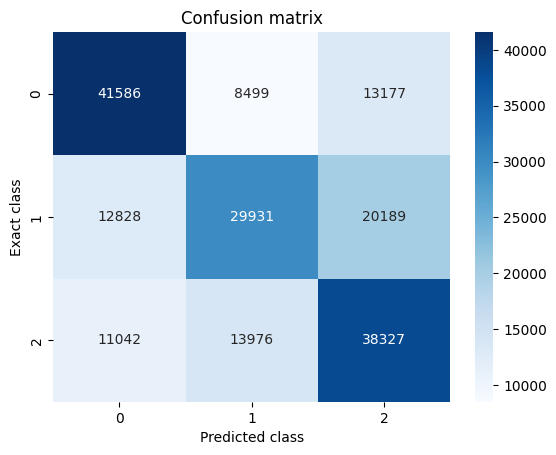

In [32]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Decision Tree is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['DecisionTreeClassifier'])
accuracy_DTmodel = pd.DataFrame({'accuracy':serie})

In [33]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.579483527208462

Classification Report:
               precision    recall  f1-score   support

         0.0       0.64      0.66      0.65     63262
         1.0       0.57      0.48      0.52     62948
         2.0       0.53      0.61      0.57     63345

    accuracy                           0.58    189555
   macro avg       0.58      0.58      0.58    189555
weighted avg       0.58      0.58      0.58    189555

Specificity for class 0: 0.8110
Specificity for class 1: 0.8225
Specificity for class 2: 0.7356



Este modelo tiene un **accuracy del 57.9%** y un **desempeño general moderado**, con F1-scores entre **0.52 y 0.65** para las tres clases. Aunque no presenta resultados sobresalientes, al menos **trata todas las clases de forma equilibrada**. La clase 0 es la que obtiene mejores resultados, mientras que las clases 1 y 2 tienen un desempeño aceptable. Las **specificities** (entre 73.5% y 82.2%) indican que el modelo controla bien los falsos positivos. En resumen, es un modelo **estable pero débil**, útil como referencia, pero **claramente superado por otros modelos con mejor cobertura y precisión general**.